<a href="https://colab.research.google.com/github/MinabutdinovAlmaz/MlPython/blob/main/MinabutdinovAA_4405_lab4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №4** - Использование библиотеки TensorFlow/Keras для создания CNN. Обучение CNN на данных MNIST, CIFAR-10 и Cats vs Dogs

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

**Построение и обучение CNN на данных с бинарной классификацией (Cats vs Dogs)**

In [ ]:
# Подключение модуля для загрузки данных из облака
import gdown

# Загрузка zip-архива датасета Cats vs Dogs
gdown.download('https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip', None, quiet=True)

# Разархивация датасета в директорию 'content/'
#знак ! - следующая операция выполнится напрямую в консоли виртуальной машины
!unzip -qo "cats_and_dogs_filtered.zip" -d /content/

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/cats_and_dogs_filtered/'

# Для работы с файлами
import os
dirs = sorted(os.listdir(IMAGE_PATH))
train_path = os.path.join(IMAGE_PATH, dirs[0])
valid_path = os.path.join(IMAGE_PATH, dirs[1])

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(train_path))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

#Подготовка к созданию обучающей выборки - получение списка файлов
traindata_files = []                           # Cписок путей к файлам картинок
traindata_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = train_path + '/' + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    traindata_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    traindata_labels += [class_label] * len(class_files)

#Подготовка к созданию проверочной выборки - получение списка файлов
validdata_files = []                           # Cписок путей к файлам картинок
validdata_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = valid_path + '/' + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    validdata_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    validdata_labels += [class_label] * len(class_files)

img_height = 120
img_width = 120

In [ ]:
#создание обучающей выборки
traindata_images = []                          # Пустой список для данных изображений
for file_name in traindata_files:

    # Открытие и смена размера изображения
    img = Image.open(file_name).resize((img_width, img_height))
    img_np = np.array(img)                # Перевод в numpy-массив
    traindata_images.append(img_np)            # Добавление изображения в виде numpy-массива к общему списку

x_data = np.array(traindata_images)            # Перевод общего списка изображений в numpy-массив
y_data = np.array(traindata_labels)            # Перевод общего списка меток класса в numpy-массив

#создание проверочной выборки
validdata_images = []                          # Пустой список для данных изображений

for file_name in validdata_files:
    # Открытие и смена размера изображения
    img = Image.open(file_name).resize((img_width, img_height))
    img_np = np.array(img)                # Перевод в numpy-массив
    validdata_images.append(img_np)            # Добавление изображения в виде numpy-массива к общему списку

val_x_data = np.array(validdata_images)            # Перевод общего списка изображений в numpy-массив
val_y_data = np.array(validdata_labels)            # Перевод общего списка меток класса в numpy-массив

# Нормированние массивов изображений
x_data = x_data / 255.
val_x_data = val_x_data / 255.

In [ ]:
# Исходная модель CNN

model = Sequential([
    # Первый сверточный слой
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # Второй сверточный слой
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Третий сверточный слой
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Четвертый сверточный слой
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Преобразование в вектор
    Flatten(),

    # Полносвязные слои
    Dense(512, activation='relu'),
    #Dropout(0.5),  # Добавляем Dropout для регуляризации
    Dense(1, activation='sigmoid')  # Выходной слой для бинарной классификации
])

#Компиляция модели
#Для бинарной классификации используем функцию потерь binary_crossentropy и метрику accuracy.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Обучение модели
epochs = 8

history = model.fit(
    x_data, y_data,
    validation_data=(val_x_data, val_y_data),
    epochs=epochs
)

Epoch 1/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.5174 - loss: 0.6921 - val_accuracy: 0.5940 - val_loss: 0.6676
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5952 - loss: 0.6718 - val_accuracy: 0.6470 - val_loss: 0.6191
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6615 - loss: 0.6148 - val_accuracy: 0.6900 - val_loss: 0.5796
Epoch 4/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7118 - loss: 0.5622 - val_accuracy: 0.7010 - val_loss: 0.5982
Epoch 5/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7395 - loss: 0.5179 - val_accuracy: 0.7140 - val_loss: 0.5539
Epoch 6/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8213 - loss: 0.4228 - val_accuracy: 0.7180 - val_loss: 0.5510
Epoch 7/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8165 - loss: 0.3779 - val_accuracy: 0.7360 - val_loss: 0.5703
Epoch 8/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8697 - loss: 0.3246 - val_accuracy: 0.7360 - val_loss:

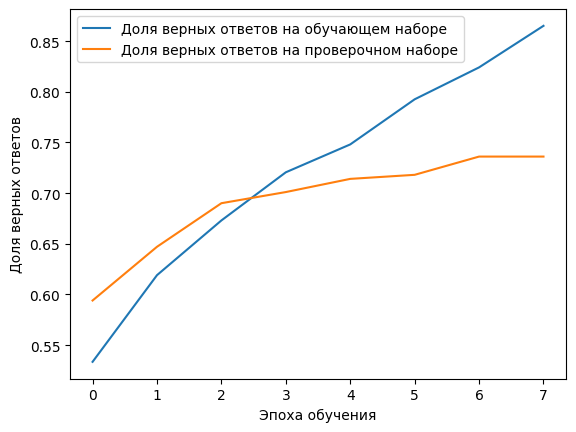

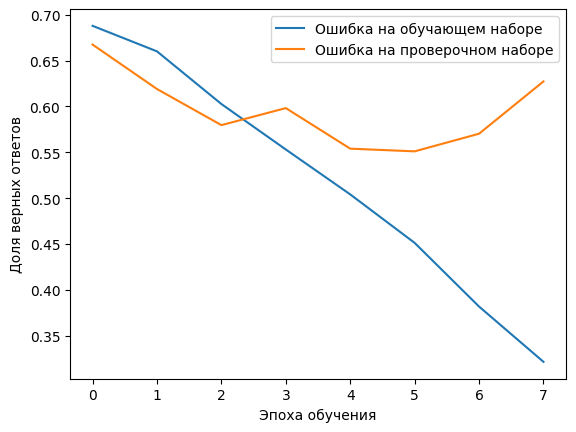

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Оображаем график ошибки обучения
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
#Оценка на тестовых данных
loss, accuracy = model.evaluate(val_x_data, val_y_data)
print(f"Потери: {loss}")
print(f"Точность: {accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8055 - loss: 0.4569
Потери: 0.6273356080055237
Точность: 0.7360000014305115


Самостоятельная работа:

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.4715 - loss: 0.7031 - val_accuracy: 0.5580 - val_loss: 0.6929
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5179 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6974
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5157 - loss: 0.6903 - val_accuracy: 0.5020 - val_loss: 0.8192
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5100 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6846
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5289 - loss: 0.6869 - val_accuracy: 0.6140 - val_loss: 0.6610
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5968 - loss: 0.6676 - val_accuracy: 0.6190 - val_loss: 0.6437
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6694 - loss: 0.6139 - val_accuracy: 0.5690 - val_loss: 0.7100
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6521 - loss: 0.6162 - val_accuracy: 0.5840 - v

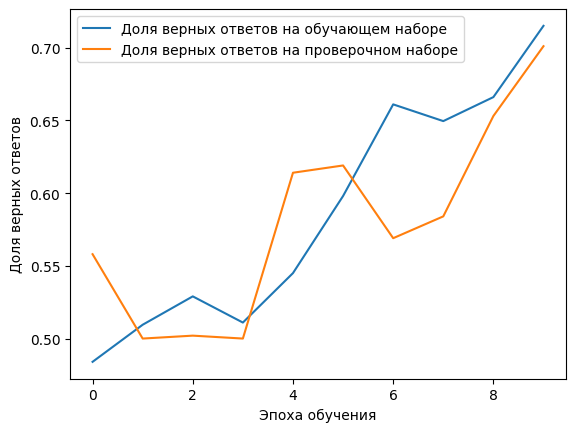

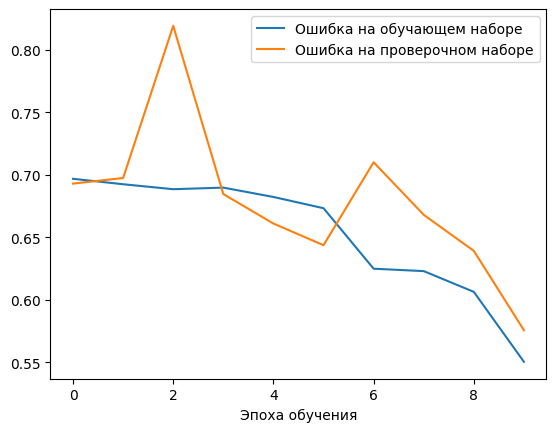

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6599 - loss: 0.6324
Потери: 0.5756035447120667
Точность: 0.7009999752044678


In [ ]:
model2 = Sequential([
    # Первый сверточный слой
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # Второй сверточный слой
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Третий сверточный слой
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Четвертый сверточный слой
    Conv2D(256, (4, 4), activation='relu'),
    MaxPooling2D(3, 3),

    # Преобразование в вектор
    Flatten(),

    # Полносвязные слои
    Dense(512, activation='relu'),

    # Применяем исключение (дропаут) на вводе
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Выходной слой для бинарной классификации
])

#Компиляция модели
#Для бинарной классификации используем функцию потерь binary_crossentropy и метрику accuracy.
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Обучение модели
epochs = 10

history = model2.fit(
    x_data, y_data,
    validation_data=(val_x_data, val_y_data),
    epochs=epochs
)

#Оображаем график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Оображаем график ошибки обучения
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.legend()
plt.show()

#Оценка на тестовых данных
loss, accuracy = model2.evaluate(val_x_data, val_y_data)
print(f"Потери: {loss}")
print(f"Точность: {accuracy}")

удалось увеличить точность с 0.69 до 0.74

In [ ]:
import matplotlib.image as mpimg
import cv2

def fun(name):
  # Загружаем изображение
  image = cv2.imread(name)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  scaled_image = cv2.resize(image_rgb, (120, 120))
  # Вывод изображения
  plt.figure(figsize=(1, 1))
  plt.imshow(scaled_image)
  plt.axis('off')
  plt.show()
  # Нормализация данных
  scaled_image = scaled_image / 255.0
  # Делаем массив из одного примера
  scaled_image = np.expand_dims(scaled_image, axis=0)
  class_names = ['cat', 'dog']
  num = model2.predict(scaled_image)
  result = np.where(num > 0.5, 1, 0).item()
  print(class_names[result])

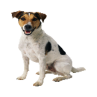

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
dog


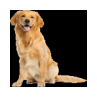

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
dog


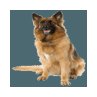

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
cat


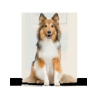

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
dog


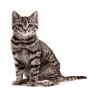

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
dog


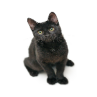

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
cat


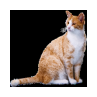

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
dog


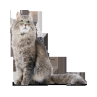

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
dog


In [ ]:
fun("dog-11310.png")
fun("dog-11367.png")
fun("dog-11422.png")
fun("dog-11429.png")
fun("cat-9141.png")
fun("cat-9145.png")
fun("cat-9148.png")
fun("cat-9151.png")


Если использвать начальную модель, то результат немного другой

In [ ]:
def fun(name):
  # Загружаем изображение
  image = cv2.imread(name)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  scaled_image = cv2.resize(image_rgb, (120, 120))
  # Вывод изображения
  plt.figure(figsize=(1, 1))
  plt.imshow(scaled_image)
  plt.axis('off')
  plt.show()
  # Нормализация данных
  scaled_image = scaled_image / 255.0
  # Делаем массив из одного примера
  scaled_image = np.expand_dims(scaled_image, axis=0)
  class_names = ['cat', 'dog']
  num = model.predict(scaled_image)
  result = np.where(num > 0.5, 1, 0).item()
  print(class_names[result])

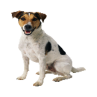

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
dog


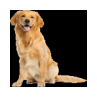

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
cat


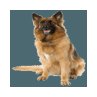

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
cat


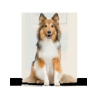

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
dog


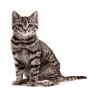

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
dog


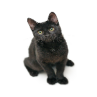

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
cat


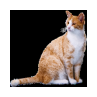

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
cat


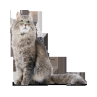

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
dog


In [ ]:
fun("dog-11310.png")
fun("dog-11367.png")
fun("dog-11422.png")
fun("dog-11429.png")
fun("cat-9141.png")
fun("cat-9145.png")
fun("cat-9148.png")
fun("cat-9151.png")